# compare different models

By trying to predict the total number of bikes people rented in a given hour in Washington D.C., we will see the performance of different models. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
bike_rentals=pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()
%matplotlib inline

(array([5616., 2669., 2392., 1900., 1413., 1006.,  704.,  552.,  394.,
         263.,  190.,  104.,  105.,   55.,   16.]),
 array([  1.        ,  66.06666667, 131.13333333, 196.2       ,
        261.26666667, 326.33333333, 391.4       , 456.46666667,
        521.53333333, 586.6       , 651.66666667, 716.73333333,
        781.8       , 846.86666667, 911.93333333, 977.        ]),
 <a list of 15 Patch objects>)

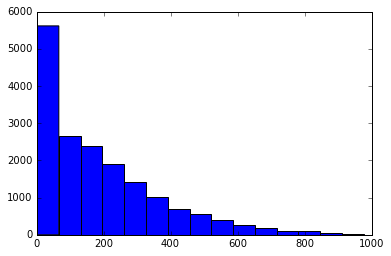

In [3]:
plt.hist(bike_rentals['cnt'], bins=15)

In [4]:
bike_rentals.cnt.sum()

3292679

In [5]:
#check the correlation of the count of rented bikes to the other features
bike_rentals.corr().cnt

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [6]:
#assign labels for morning, afternoon, night and early morning
def assign_label(hr):
    if 6<=hr<12:
        return 1
    if 12<=hr<18:
        return 2
    if 18<=hr<24:
        return 3
    if 0<=hr<6:
        return 4

bike_rentals['time_label']=bike_rentals['hr'].apply(lambda x:assign_label(x))    

In [41]:
bike_rentals.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_label'],
      dtype='object')

In [7]:
#decide which features to use for prediction
features=bike_rentals.columns.drop(['instant','dteday','casual', 'registered', 'cnt'])

Prepare the dataset (Train/Test)

In [50]:
from sklearn.model_selection import train_test_split
X=bike_rentals[features]
y=bike_rentals['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(13903, 13)

In [52]:
X_test.shape

(3476, 13)

Performance of Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [55]:
m1=LinearRegression()
m1.fit(X_train, y_train)
print(m1.score(X_train,y_train))
print(m1.score(X_test,y_test))

0.47083208828886947
0.4590379059694224


Performance of a Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
m2=DecisionTreeRegressor(min_samples_leaf=35)
m2.fit(X_train, y_train)
print(m2.score(X_train,y_train))
print(m2.score(X_test,y_test))

0.8988999965755731
0.8839302025019601


Performance of a Random Forest Ensemble

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
m3=RandomForestRegressor(min_samples_leaf=10)
m3.fit(X_train, y_train)
print(m3.score(X_train,y_train))
print(m3.score(X_test,y_test))

0.9434470857135988
0.9229009922023017
